In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stc
%matplotlib inline
import scipy.stats as stats
sns.set(color_codes = True)

## Problem-1 Statement
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

In [2]:
WSC = pd.read_csv("Wholesale Customer.csv") # read the dataset

In [3]:
WSC.head() # first five rows of the Dataset

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


Dataset has 9 variables. Buyer/Spender, Channel & Region are categorical variables while Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen are Numerical variables.

In [4]:
WSC.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


Count of all the variables are 440 which means there are 440 samples/records present in the dataset with non-null values.<br>There are 2 unique variables in Channel column & 3 unique variables in Region column.<br>Under Channel, Hotel has the high frequency & under Region, Other has high frequency.<br>Mean & Median of the variables are not close to each other and the min & max values are widely spread which means that the distributions are wide spread.

In [5]:
WSC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


There are 7 variables with Integer datatype & 2 with Object datatype

In [6]:
print("Shape of the dataset is", WSC.shape)

Shape of the dataset is (440, 9)


#### 1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [7]:
WSC['Total_Spending'] = WSC['Fresh'] + WSC['Milk'] + WSC['Grocery'] + WSC['Frozen'] + WSC['Detergents_Paper'] + WSC['Delicatessen']
WSC.groupby(WSC['Region'])[['Total_Spending']].mean().round(2)

,Total_Spending
Region,
Lisbon,30997.57
Oporto,33086.98
Other,33789.87


In [12]:
pd.DataFrame(WSC.groupby(["Region"],sort=True)["Total_Spending"].sum()).reset_index()

,Region,Total_Spending
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


In [10]:
pd.DataFrame(WSC.groupby(["Channel"],sort=True)["Total_Spending"].sum()).reset_index()

,Channel,Total_Spending
0,Hotel,7999569
1,Retail,6619931


In [8]:
WSC.groupby(WSC['Channel'])[['Total_Spending']].mean().round(2)

,Total_Spending
Channel,
Hotel,26844.19
Retail,46619.23


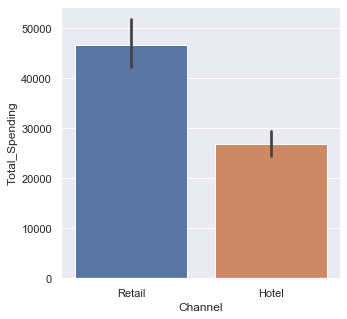

In [9]:
plt.figure(figsize = (5,5))
sns.barplot(WSC['Channel'], WSC['Total_Spending']);

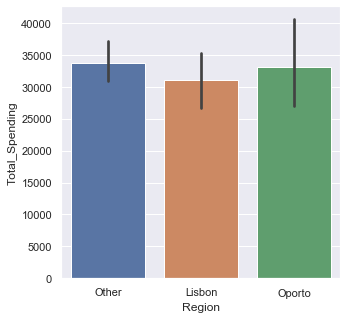

In [10]:
plt.figure(figsize = (5,5))
sns.barplot(WSC['Region'], WSC['Total_Spending']);

**Answer:** Mean spending of Retail channel seems more when compared to Hotel channel which is less. Mean spending of Other region is slightly higher than Oporto. And Lisbon region spends less.

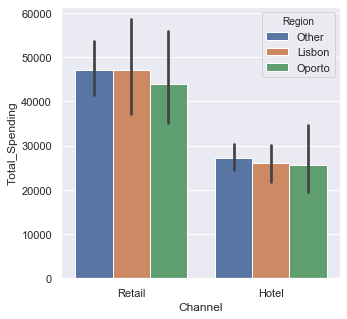

In [11]:
plt.figure(figsize = (5,5))
sns.barplot(WSC['Channel'], WSC['Total_Spending'], hue = WSC['Region']);

**Answer:** By looking at the above chart it seems that <br>•	Mean spending of Retail channel is higher than Hotel channel in all the cities.<br>•	Mean spending of Lisbon is slightly higher than Other cities in Retail channel and Oporto city has less mean spending.<br>•	Mean spending of Other cities is slightly higher than Lisbon in Hotel channel and Oporto city has less mean spending.<br>•	Mean spending of Lisbon region in Retail channel is more and Oporto region in Hotel channel spends less.


#### 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?


In [12]:
pd.pivot_table(WSC, index = ['Region'], values = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], aggfunc = np.sum)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454
Oporto,54506,173311,464721,190132,433274,239144
Other,512110,890410,3960577,930492,2495251,1888759


In [13]:
pd.pivot_table(WSC, index = ['Region'], values = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], aggfunc = np.mean)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,1354.896104,2651.116883,11101.727273,3000.337662,7403.077922,5486.415584
Oporto,1159.702128,3687.468085,9887.680851,4045.361702,9218.595745,5088.170213
Other,1620.601266,2817.753165,12533.471519,2944.594937,7896.363924,5977.085443


**Answer:** <br>•	By looking at 1st table (sum of spending) we infer that all varieties show similar behaviour across Region which means all the variety in the Other region has the highest spending, Lisbon region has the 2nd highest spending and Oporto region has the lowest spending.<br>
•	By looking at the 2nd table (mean of spending) we infer that not all varieties show similar behaviour like as we saw in pivot table 1 but Detergents_Paper, Frozen & Grocery behave in a different way that is when we take mean spending Oporto region spends more than the other 2 regions.


In [14]:
pd.pivot_table(WSC, index = ['Channel'], values = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], aggfunc = np.sum)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614
Retail,248988,1032270,1264414,234671,2317845,1521743


In [15]:
pd.pivot_table(WSC, index = ['Channel'], values = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], aggfunc = np.mean)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,1415.956376,790.560403,13475.560403,3748.251678,3962.137584,3451.724832
Retail,1753.436620,7269.507042,8904.323944,1652.612676,16322.852113,10716.500000


**Answer:** <br>•	By looking at both the pivot tables (sum & mean of the spending) it seems that Hotel channel spends more on Fresh & Frozen varieties than by the Retail channel.<br>
•	Retail channel spends more on Detergents_Paper, Grocery & Milk than the Hotels.<br>
•	So, we can say that not all varieties show similar behaviour across channels


#### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [16]:
print("Coefficient of Variation for Fresh variety is", (stats.variation(WSC['Fresh'], axis = 0)))
print("Coefficient of Variation for Milk variety is", (stats.variation(WSC['Milk'], axis = 0)))
print("Coefficient of Variation for Grocery variety is", (stats.variation(WSC['Grocery'], axis = 0)))
print("Coefficient of Variation for Frozen variety is", (stats.variation(WSC['Frozen'], axis = 0)))
print("Coefficient of Variation for Detergents_Paper variety is", (stats.variation(WSC['Detergents_Paper'], axis = 0)))
print("Coefficient of Variation for Delicatessen variety is", (stats.variation(WSC['Delicatessen'], axis = 0)))

Coefficient of Variation for Fresh variety is 1.0527196084948243
Coefficient of Variation for Milk variety is 1.27185083074245
Coefficient of Variation for Grocery variety is 1.1938154477492668
Coefficient of Variation for Frozen variety is 1.578535529860776
Coefficient of Variation for Detergents_Paper variety is 1.6527657881041735
Coefficient of Variation for Delicatessen variety is 1.8473041039189302


**Answer:** <br>By looking at the Coefficient of Variation for all 6 varieties Delicatessen shows most inconsistent behaviour and Fresh variety shows least inconsistent behaviour.

#### 1.4. Are there any outliers in the data?

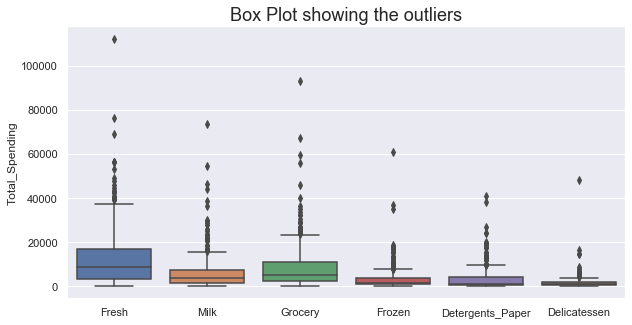

In [17]:
plt.figure(figsize = (10,5))
sns.boxplot(data=WSC[['Fresh','Milk','Grocery', 'Frozen', 'Detergents_Paper','Delicatessen']], orient = "v")
plt.ylabel("Total_Spending", size=12)
plt.title("Box Plot showing the outliers", size=18);

**Answer:** Yes, we have outliers in the data for all varieties based on the above box plot.

#### 1.5. On the basis of this report, what are the recommendations?

**Conclusion & Recommendations:**<br>
•	Spending of Retail channel is more when compared to Hotel channels.<br>
•	Fresh & Frozen varieties sales to the Retail channel is less when compared to Hotel channel.<br>
•	Sales of Delicatessen is less when compared to all other varieties.<br>
•	Also, the sales of Frozen & Detergent_Paper varieties are less.<br>
•	Hotels spend more on Fresh variety and less on Detergents_Paper variety. Retails spend more on Grocery and less on Frozen.<br>
•	All 3 regions spend more on Fresh variety and less on Delicatessen.



## Problem-2 Statement

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

In [18]:
CMSU = pd.read_csv('Survey-1.csv')

In [19]:
CMSU.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


Dataset has 14 variables. ID, Gender, Age, Class, Major, Grad Intention, Employment, Computer are categorical variables, Social Networking & Satisfaction are discrete variable while GPA, Salary, Spending & Text Messages are continuous variables.

In [20]:
CMSU.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


### Part I

### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

In [21]:
GM = pd.pivot_table(CMSU, index = ['Gender'], columns = ['Major'], values = ['ID'], aggfunc=len)
GM

ID                                                           \
Major  Accounting  CIS Economics/Finance International Business Management   
Gender                                                                       
Female        3.0  3.0               7.0                    4.0        4.0   
Male          4.0  1.0               4.0                    2.0        6.0   

                                            
Major  Other Retailing/Marketing Undecided  
Gender                                      
Female   3.0                 9.0       NaN  
Male     4.0                 5.0       3.0

#### 2.1.2. Gender and Grad Intention

In [22]:
GG = pd.pivot_table(CMSU, index = ['Gender'], columns = ['Grad Intention'], values = ['ID'], aggfunc=len)
GG

ID              
Grad Intention No Undecided Yes
Gender                         
Female          9        13  11
Male            3         9  17

#### 2.1.3. Gender and Employment

In [23]:
GE = pd.pivot_table(CMSU, index = ['Gender'], columns = ['Employment'], values = ['ID'], aggfunc=len)
GE

ID                     
Employment Full-Time Part-Time Unemployed
Gender                                   
Female             3        24          6
Male               7        19          3

#### 2.1.4. Gender and Computer

In [24]:
GC = pd.pivot_table(CMSU, index = ['Gender'], columns = ['Computer'], values = ['ID'], aggfunc=len)
GC

ID              
Computer Desktop Laptop Tablet
Gender                        
Female       2.0   29.0    2.0
Male         3.0   26.0    NaN

### 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?

In [25]:
GI = pd.pivot_table(CMSU, index = ['Gender'], values = ['ID'], aggfunc=len)
GI

,ID
Gender,
Female,33
Male,29


In [26]:
print("Probability of a randomly selected CMSU student will be a Male is",round((29/(29+33)),2))
print("Probability of a randomly selected CMSU student will be a Female is",round((33/(29+33)),2))

Probability of a randomly selected CMSU student will be a Male is 0.47
Probability of a randomly selected CMSU student will be a Female is 0.53


#### 2.2.2. Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU.

In [27]:
print("Conditional probablity of Accounting major given Male student is",round((4/29),2))
print("Conditional probablity of CIS major given Male student is",round((1/29),2))
print("Conditional probablity of Economics/Finance major given Male student is",round((4/29),2))
print("Conditional probablity of International Business major given Male student is",round((2/29),2))
print("Conditional probablity of Management major given Male student is",round((6/29),2))
print("Conditional probablity of Other major given Male student is",round((4/29),2))
print("Conditional probablity of Retailing/Marketing major given Male student is",round((5/29),2))
print("Conditional probablity of Undecided major given Male student is",round((3/29),2))

Conditional probablity of Accounting major given Male student is 0.14
Conditional probablity of CIS major given Male student is 0.03
Conditional probablity of Economics/Finance major given Male student is 0.14
Conditional probablity of International Business major given Male student is 0.07
Conditional probablity of Management major given Male student is 0.21
Conditional probablity of Other major given Male student is 0.14
Conditional probablity of Retailing/Marketing major given Male student is 0.17
Conditional probablity of Undecided major given Male student is 0.1


In [28]:
print("Conditional probablity of Accounting major given Female student is",round((3/33),2))
print("Conditional probablity of CIS major given Female student is",round((3/33),2))
print("Conditional probablity of Economics/Finance major given Female student is",round((7/33),2))
print("Conditional probablity of Internationsl Business major given Female student is",round((4/33),2))
print("Conditional probablity of Management major given Female student is",round((4/33),2))
print("Conditional probablity of Other major given Female student is",round((3/33),2))
print("Conditional probablity of Retailing/Marketing major given Female student is",round((9/33),2))
print("Conditional probablity of Undecided major given Female student is",round((0/33),2))

Conditional probablity of Accounting major given Female student is 0.09
Conditional probablity of CIS major given Female student is 0.09
Conditional probablity of Economics/Finance major given Female student is 0.21
Conditional probablity of Internationsl Business major given Female student is 0.12
Conditional probablity of Management major given Female student is 0.12
Conditional probablity of Other major given Female student is 0.09
Conditional probablity of Retailing/Marketing major given Female student is 0.27
Conditional probablity of Undecided major given Female student is 0.0


#### 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male. Find the conditional probability of intent to graduate, given that the student is a female.

In [29]:
print("Conditional probablity of Intent to graduate given Male student is",round((17/29),2))
print("Conditional probablity of Intent to graduate given Female student is",round((11/33),2))

Conditional probablity of Intent to graduate given Male student is 0.59
Conditional probablity of Intent to graduate given Female student is 0.33


#### 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [30]:
print("Conditional probablity of employment status Full-Time is",round((10/(29+33)),2))
print("Conditional probablity of employment status Part-Time is",round((43/(29+33)),2))
print("Conditional probablity of employment status Unemployed is",round((9/(29+33)),2))

Conditional probablity of employment status Full-Time is 0.16
Conditional probablity of employment status Part-Time is 0.69
Conditional probablity of employment status Unemployed is 0.15


#### 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [31]:
print("Conditional probablity of laptop preference among Male students is",round((26/29),2))
print("Conditional probablity of laptop preference among Female students is",round((29/33),2))

Conditional probablity of laptop preference among Male students is 0.9
Conditional probablity of laptop preference among Female students is 0.88


### 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.


Based on the above probabilities, column variable is independent of Gender only for 1 case (2.2.4) and dependent for all other cases.

*Question 2.2.1* - Not independent since question itself states the probablity for Male & probablity for Female.<br>
*Question 2.2.2* - Not independent since question states probablity of different major among Male and Female separately.<br>
*Question 2.2.3* - Not independent since question states probablity of student intent to graduate given that is a Male/Female.<br>
*Question 2.2.4* - Independent since question states probablity of employment status for Male + Female. So it states the employment status irrespective of the gender.<br>
*Question 2.2.5* - Not independent since question states probablity of laptop prefrence among Male and Female separately.

### Part II

### 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]


In [32]:
CMSU.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


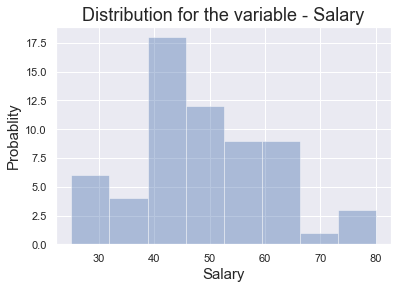

In [33]:
sns.distplot(CMSU['Salary'], kde = False)
plt.xlabel("Salary", size=15)
plt.ylabel("Probablity", size=15)
plt.title("Distribution for the variable - Salary", size=18);

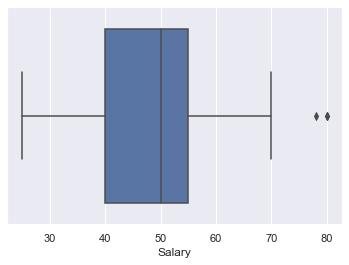

In [34]:
sns.boxplot(CMSU['Salary']);

In [35]:
print("one_stdev is from", round((stc.mean(CMSU['Salary']) - stc.stdev(CMSU['Salary'])),2), "to", 
      round((stc.mean(CMSU['Salary']) + stc.stdev(CMSU['Salary'])),2))
print("two_stdev is from", round((stc.mean(CMSU['Salary']) - 2*stc.stdev(CMSU['Salary'])),2), "to", 
      round((stc.mean(CMSU['Salary']) + 2*stc.stdev(CMSU['Salary'])),2))
print("two_stdev is from", round((stc.mean(CMSU['Salary']) - 3*stc.stdev(CMSU['Salary'])),2), "to", 
      round((stc.mean(CMSU['Salary']) + 3*stc.stdev(CMSU['Salary'])),2))

one_stdev is from 36.47 to 60.63
two_stdev is from 24.39 to 72.71
two_stdev is from 12.31 to 84.79


In [36]:
a = CMSU[(CMSU['Salary'] > 36.47) & (CMSU['Salary'] < 60.63)]['Salary'].count()
b = CMSU['Salary'].count()
c = CMSU[(CMSU['Salary'] > 24.39) & (CMSU['Salary'] < 72.71)]['Salary'].count()
d = CMSU['Salary'].count()
e = CMSU[(CMSU['Salary'] > 12.31) & (CMSU['Salary'] < 84.79)]['Salary'].count()
f = CMSU['Salary'].count()

In [37]:
print('Area under 1 Standard Deviation is', round(((a/b)*100),2), '%')
print('Area under 2 Standard Deviation is', round(((c/d)*100),2), '%')
print('Area under 3 Standard Deviation is', round(((e/f)*100),2), '%')

Area under 1 Standard Deviation is 79.03 %
Area under 2 Standard Deviation is 95.16 %
Area under 3 Standard Deviation is 100.0 %


In [38]:
stats.shapiro(CMSU['Salary'])

(0.9565856456756592, 0.028000956401228905)

**Answer:** For any normal distribution mean, median & mode should be equal but for the Salary variable it is not same. By looking at these plots we understand that it is right skewed distribution with outliers. And it does not follow the empirical rule and p-value based on shapiro test is < 0.05 so we cannot say that the distribution is normal.

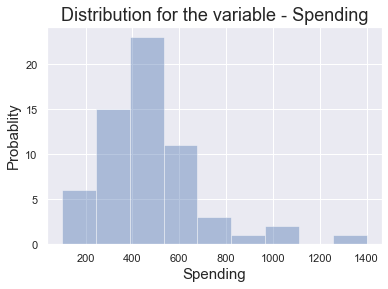

In [39]:
sns.distplot(CMSU['Spending'], kde = False)
plt.xlabel("Spending", size=15)
plt.ylabel("Probablity", size=15)
plt.title("Distribution for the variable - Spending", size=18);

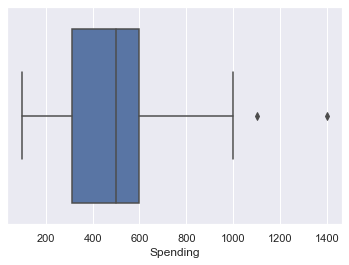

In [40]:
sns.boxplot(CMSU['Spending']);

In [41]:
print("one_stdev is from", round((stc.mean(CMSU['Spending']) - stc.stdev(CMSU['Spending'])),2), "to", 
      round((stc.mean(CMSU['Spending']) + stc.stdev(CMSU['Spending'])),2))
print("two_stdev is from", round((stc.mean(CMSU['Spending']) - 2*stc.stdev(CMSU['Spending'])),2), "to", 
      round((stc.mean(CMSU['Spending']) + 2*stc.stdev(CMSU['Spending'])),2))
print("two_stdev is from", round((stc.mean(CMSU['Spending']) - 3*stc.stdev(CMSU['Spending'])),2), "to", 
      round((stc.mean(CMSU['Spending']) + 3*stc.stdev(CMSU['Spending'])),2))

one_stdev is from 260.06 to 703.97
two_stdev is from 38.11 to 925.92
two_stdev is from -183.85 to 1147.88


In [42]:
g = CMSU[(CMSU['Spending'] > 260.06) & (CMSU['Spending'] < 703.97)]['Spending'].count()
h = CMSU['Spending'].count()
i = CMSU[(CMSU['Spending'] > 38.11) & (CMSU['Spending'] < 925.92)]['Spending'].count()
j = CMSU['Spending'].count()
k = CMSU[(CMSU['Spending'] > -183.85) & (CMSU['Spending'] < 1147.88)]['Spending'].count()
l = CMSU['Spending'].count()

In [43]:
print('Area under 1 Standard Deviation is', round(((g/h)*100),2), '%')
print('Area under 2 Standard Deviation is', round(((i/j)*100),2), '%')
print('Area under 3 Standard Deviation is', round(((k/l)*100),2), '%')

Area under 1 Standard Deviation is 80.65 %
Area under 2 Standard Deviation is 95.16 %
Area under 3 Standard Deviation is 98.39 %


In [44]:
stats.shapiro(CMSU['Spending'])

(0.8777452111244202, 1.6854661225806922e-05)

**Answer:** For any normal distribution mean, median & mode should be equal but for the Spending variable it is not same. By looking at these plots we understand that it is right skewed distribution with outliers. And it does not follow the empirical rule and p-value based on shapiro test is < 0.05 so we cannot say that the distribution is normal.

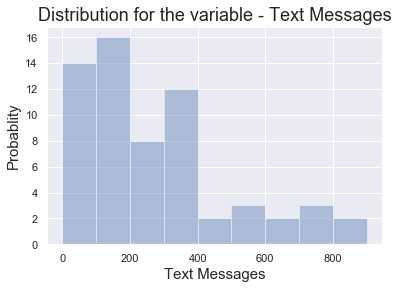

In [45]:
sns.distplot(CMSU['Text Messages'], kde = False)
plt.xlabel("Text Messages", size=15)
plt.ylabel("Probablity", size=15)
plt.title("Distribution for the variable - Text Messages", size=18);

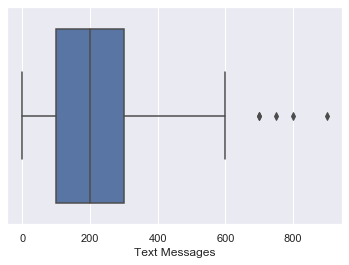

In [46]:
sns.boxplot(CMSU['Text Messages']);

In [47]:
print("one_stdev is from", round((stc.mean(CMSU['Text Messages']) - stc.stdev(CMSU['Text Messages'])),2), "to", 
      round((stc.mean(CMSU['Text Messages']) + stc.stdev(CMSU['Text Messages'])),2))
print("two_stdev is from", round((stc.mean(CMSU['Text Messages']) - 2*stc.stdev(CMSU['Text Messages'])),2), "to", 
      round((stc.mean(CMSU['Text Messages']) + 2*stc.stdev(CMSU['Text Messages'])),2))
print("two_stdev is from", round((stc.mean(CMSU['Text Messages']) - 3*stc.stdev(CMSU['Text Messages'])),2), "to", 
      round((stc.mean(CMSU['Text Messages']) + 3*stc.stdev(CMSU['Text Messages'])),2))

one_stdev is from 31.74 to 460.68
two_stdev is from -182.72 to 675.14
two_stdev is from -397.19 to 889.61


In [48]:
m = CMSU[(CMSU['Text Messages'] > 31.74) & (CMSU['Text Messages'] < 460.68)]['Text Messages'].count()
n = CMSU['Text Messages'].count()
o = CMSU[(CMSU['Text Messages'] > -182.72) & (CMSU['Text Messages'] < 675.14)]['Text Messages'].count()
p = CMSU['Text Messages'].count()
q = CMSU[(CMSU['Text Messages'] > -397.19) & (CMSU['Text Messages'] < 889.61)]['Text Messages'].count()
r = CMSU['Text Messages'].count()

In [49]:
print('Area under 1 Standard Deviation is', round(((m/n)*100),2), '%')
print('Area under 2 Standard Deviation is', round(((o/p)*100),2), '%')
print('Area under 3 Standard Deviation is', round(((q/r)*100),2), '%')

Area under 1 Standard Deviation is 79.03 %
Area under 2 Standard Deviation is 91.94 %
Area under 3 Standard Deviation is 98.39 %


In [50]:
stats.shapiro(CMSU['Text Messages'])

(0.8594191074371338, 4.324040673964191e-06)

**Answer:** For any normal distribution mean, median & mode should be equal but for the Text Messages variable it is not same. By looking at these plots we understand that it is right skewed distribution with outliers. And it does not follow the empirical rule and p-value based on shapiro test is < 0.05 so we cannot say that the distribution is normal.

### Problem-3 Statement

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:<br>H0: <=0.35<br>Ha: >0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:<br>H0: <=0.35<br>Ha: >0.35


In [51]:
shingles = pd.read_csv('A & B shingles-1.csv')

In [52]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


Dataset has 2 variables A & B.

In [53]:
shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


Looking at the descriptive statistics table we understood that count of variable A is 36 & B is 31.<br>
Mean, Median & Standard Deviation for the data slightly vary.<br>
Range (Max-Min) of variable A is higher than variable B.


#### Step 1: Define null and alternative hypotheses

In testing whether the mean of shingles A & B are same, the null hypothesis states that the mean moisture content are the same, $\mu{A}$ equals $\mu{B}$. The alternative hypothesis states that the mean moisture content are different, $\mu{A}$ is not equal to $\mu{B}$.

* $H_0$: $\mu{A}$ - $\mu{B}$ =      0 i.e        $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ - $\mu{B}$ $\neq$  0 i.e      $\mu{A}$ $\neq$ $\mu{B}$

#### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

#### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  different. $n_{1}$ = 36 & $n_{2}$ = 31
* The sample is a large sample, n > 30. We use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.

#### Step 4: Calculate the p - value and test statistic

In [54]:
x1bar = np.mean(shingles['A'])
x2bar = np.mean(shingles['B'])
sd1 = shingles['A'].std()
sd2 = shingles['B'].std()
n1 = 36
n2 = 31
num = x1bar - x2bar
den = (((sd1**2)/n1) + ((sd2**2)/n2))**0.5
t_stat = num/den
print("t_stat =",t_stat)

t_stat = 1.2885080295255011


In [55]:
p_value = (1 - stats.t.cdf(num, loc = 0, scale = den, df = (n1+n2-2)))*2
p_value
print("p_value =", p_value)

p_value = 0.2021367388324704


#### Step 5:  Decide to reject or accept null hypothesis

In [56]:
alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population means of shingles A & B are not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that population means of shingles A & B are equal.')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that population means of shingles A & B are equal.


#### 3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Based on the above hypothesis test, we don't have enough evidence to reject the null hypothesis in favour of alternative hypothesis at 95% confidence level so we conclude that population means of shingles A & B are equal.

Below are the assumptions:<br>1. The samples are random and independent.<br>2. The population standard deviation are not known in order to conduct T-test.<br>3. The populations are normally distributed or the sample sizes for both samples are greater than or equal to 30.

#### 3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

The populations are normally distributed or the sample sizes for both samples are greater than or equal to 30. Here both the sample sizes are greater than 30 so we can say that the distribution of the sample means are normally distributed.